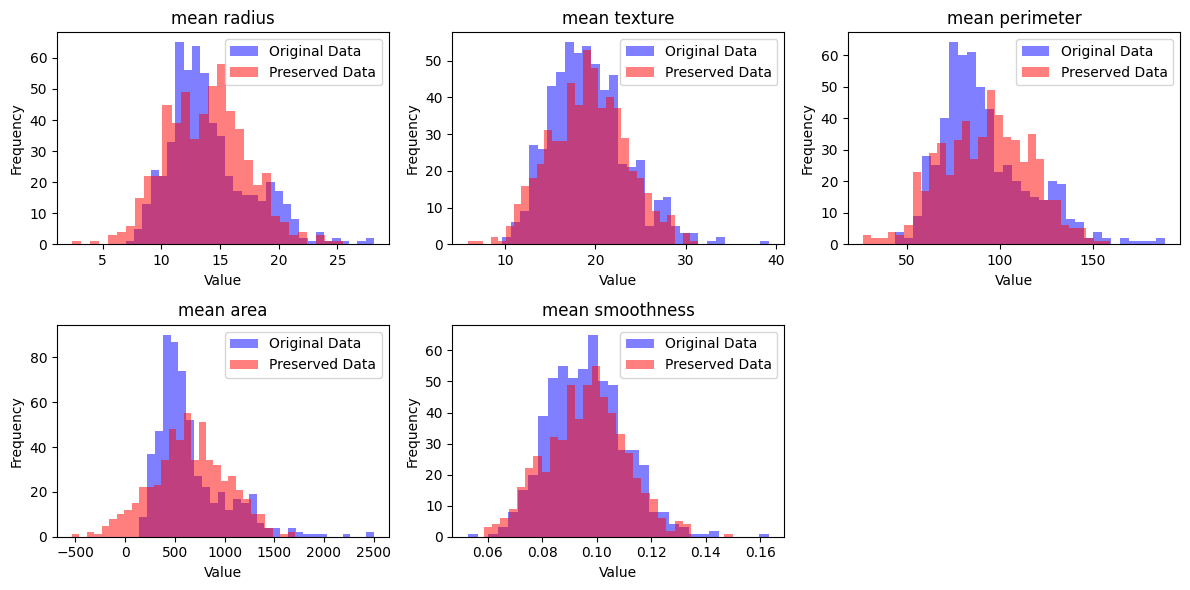

Mean Absolute Error (MAE) between original and preserved data: 0.0


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names
target_names = data.target_names

# Convert the dataset to a pandas DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['label'] = y

# Identify sensitive attributes
sensitive_attributes = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']

# Generate non-sensitive substitutes for sensitive attributes
for attribute in sensitive_attributes:
    df[attribute + '_masked'] = np.random.normal(df[attribute].mean(), df[attribute].std(), size=len(df))

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('label', axis=1), df['label'], test_size=0.2, random_state=42)

# Train a classifier on the original dataset
clf_original = RandomForestClassifier(random_state=42)
clf_original.fit(X_train, y_train)

# Make predictions on the test set using the original dataset
y_pred_original = clf_original.predict(X_test)

# Train a classifier on the masked dataset
clf_masked = RandomForestClassifier(random_state=42)
clf_masked.fit(X_train.drop(sensitive_attributes, axis=1), y_train)

# Make predictions on the test set using the masked dataset
y_pred_masked = clf_masked.predict(X_test.drop(sensitive_attributes, axis=1))

# Calculate Mean Absolute Error (MAE) between predictions on original and masked datasets
mae = mean_absolute_error(y_pred_original, y_pred_masked)

# Visualize original and preserved data
plt.figure(figsize=(12, 6))
for i, attribute in enumerate(sensitive_attributes, start=1):
    plt.subplot(2, 3, i)
    plt.hist(df[attribute], bins=30, alpha=0.5, color='blue', label='Original Data')
    plt.hist(df[attribute + '_masked'], bins=30, alpha=0.5, color='red', label='Preserved Data')
    plt.title(attribute)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()
plt.tight_layout()
plt.show()

# Print the Mean Absolute Error (MAE)
print("Mean Absolute Error (MAE) between original and preserved data:", mae)


In [2]:
from sklearn.metrics import accuracy_score

# Calculate accuracy score between predictions on original and masked datasets
accuracy = accuracy_score(y_pred_original, y_pred_masked)

# Print the accuracy score
print("Accuracy score of the preserved data:", accuracy)


Accuracy score of the preserved data: 1.0
